<a href="https://colab.research.google.com/github/patil732/BankFraudDetection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder


Step 1 :- Load Dataset and View Dataset Info

In [140]:
df = pd.read_csv("/content/bank_transactions_data_2.csv")

print("Dataset loaded successfully!")
print("Shape of data:", df.shape)


Dataset loaded successfully!
Shape of data: (2512, 16)


In [141]:
print("\nFirst 5 rows:\n", df.head())



First 5 rows:
   TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor      

In [142]:
print("\nData Info:\n")
print(df.info())



Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBala

In [143]:
print(df.columns)

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')


Step 2 :- Statistical Summary

In [144]:
print("Statistical Summary of Numerical Features:")
print(df.describe())


Statistical Summary of Numerical Features:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


Step 3 :- Check Data Types

In [145]:
print("Data types Before conversion:\n", df.dtypes)

Data types Before conversion:
 TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object


Step 4 :- Target Variable Creation

In [146]:
# create a 'isFraud' column
amount_threshold = df['TransactionAmount'].quantile(0.99)  # top 1% as fraud
login_threshold = 3  # more than 3 login attempts

df['isFraud'] = ((df['TransactionAmount'] > amount_threshold) | (df['LoginAttempts'] > login_threshold)).astype(int)

print("Fraud distribution after labeling:")
print(df['isFraud'].value_counts())


Fraud distribution after labeling:
isFraud
0    2423
1      89
Name: count, dtype: int64


/tmp/ipython-input-757581250.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud', data=df, palette="Set2")


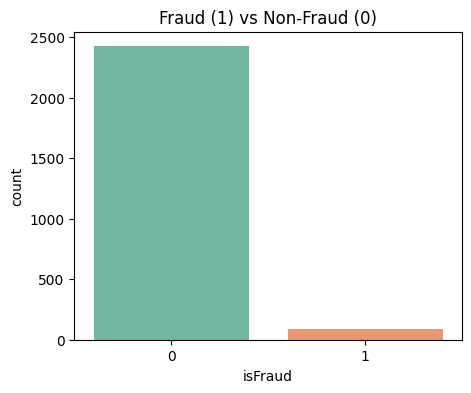


🔹 Fraud vs Non-Fraud Count:
isFraud
0    2423
1      89
Name: count, dtype: int64


In [147]:
plt.figure(figsize=(5,4))
sns.countplot(x='isFraud', data=df, palette="Set2")
plt.title("Fraud (1) vs Non-Fraud (0)")
plt.show()

print("\n Fraud vs Non-Fraud Count:")
print(df['isFraud'].value_counts())


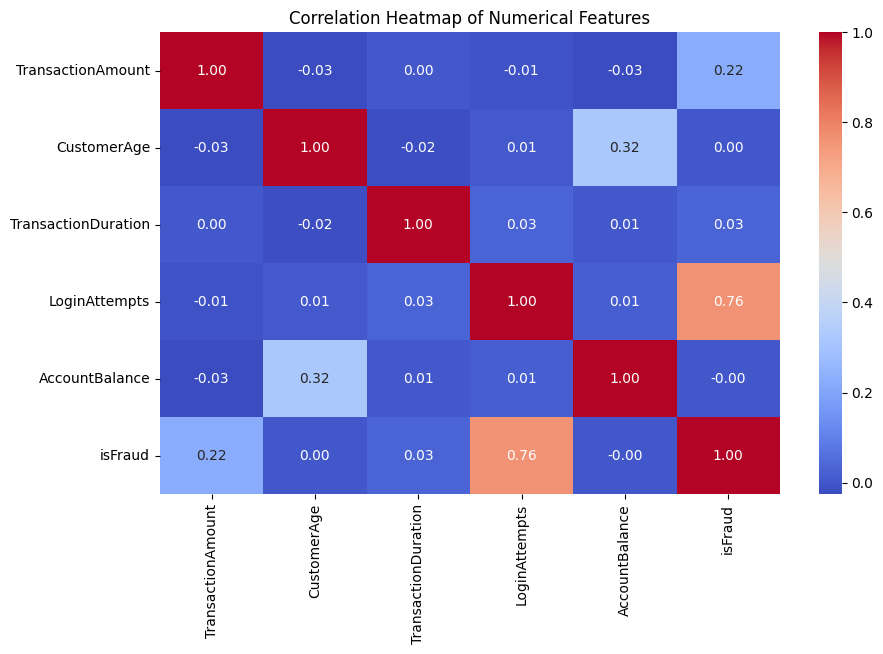

In [148]:
# Correlation Heatmap
plt.figure(figsize=(10,6))

numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

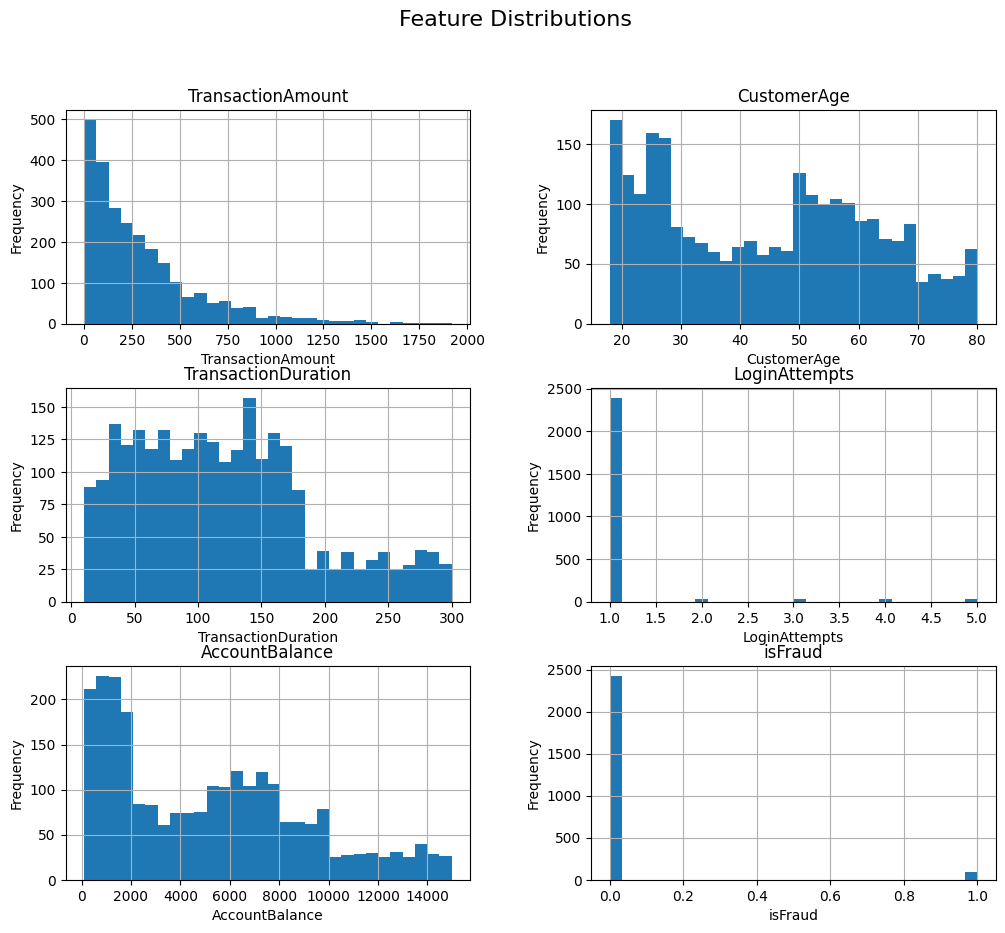

In [167]:
# Feature Distributions

numeric_cols = df.select_dtypes(include=['int64','float64']).columns

df[numeric_cols].hist(figsize=(12,10), bins=30)
plt.suptitle("Feature Distributions", size=16)


for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i + 1)
    plt.xlabel(col)
    plt.ylabel("Frequency")


plt.show()

Step 5 :- Preprocessing

In [151]:
# Handle missing values

print("Missing handling:\n", df.isnull().sum())

Missing handling:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
isFraud                    0
dtype: int64


In [152]:
# Encode categorical features
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [153]:
# Scale numeric features
scaler = StandardScaler()

numeric_cols_to_scale = df.select_dtypes(include=np.number).columns.drop('isFraud')
df[numeric_cols_to_scale] = scaler.fit_transform(df[numeric_cols_to_scale])

print("\nPreprocessing Done!")
print(df.head())


Preprocessing Done!
   TransactionID  AccountID  TransactionAmount  TransactionDate  \
0      -1.731361  -0.841708          -0.971275        -0.788111   
1      -1.729982   1.418890           0.269440        -0.087568   
2      -1.728603  -1.595241          -0.586882         0.028270   
3      -1.727224  -1.246384          -0.387456        -0.596427   
4      -1.725845   1.111896          -0.973468         0.970142   

   TransactionType  Location  DeviceID  IP Address  MerchantID   Channel  \
0         0.540538  1.221714  0.137594   -0.654873   -1.189384 -1.225361   
1         0.540538 -0.492416 -1.451941   -1.267987    0.085305 -1.225361   
2         0.540538  0.160586 -0.548682    0.270695   -1.396090  1.247014   
3         0.540538  0.976839 -0.785850    0.017196   -1.637248  1.247014   
4        -1.850010 -1.635170 -0.200498    1.202158    1.428896  1.247014   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.423718           -1.337394           